In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sci

In [2]:
#reading in the peak bed file
peaks = pd.read_csv("foxa1_data/bedpeaksfoxa1_new.bed", sep= "\t", header = None)
peaks.columns = ["chr", "start", "end"]
peaks["region"] = peaks["start"].astype(str) + "_" + peaks["end"].astype(str)
peaks["total"] = peaks["chr"].astype(str) + "_" + peaks["region"].astype(str)

In [3]:
peaks.head()

,chr,start,end,region,total
0,chr1,3045609,3046110,3045609_3046110,chr1_3045609_3046110
1,chr1,3046216,3046717,3046216_3046717,chr1_3046216_3046717
2,chr1,3081059,3081560,3081059_3081560,chr1_3081059_3081560
3,chr1,3104358,3104859,3104358_3104859,chr1_3104358_3104859
4,chr1,3129212,3129713,3129212_3129713,chr1_3129212_3129713


In [5]:
#reading in the table from the ReadInAnnotations script
viable = pd.read_csv("foxa1_data/novel_peak_table3.tsv", header = 0, sep = "\t")

In [6]:
len(viable)

253908

In [7]:
import scipy.io as sio

In [8]:
#read in peak counts and peak cell ids
counts = sio.mmread("foxa1_data/foxA1_peak_counts_G2.mtx")


In [14]:
cell_idsatac = pd.read_csv("foxa1_data/G2peakcelltypes.txt", header = 0, sep = "\t")
cell_idsrna = pd.read_csv("foxa1_data/G2rnacelltypes.txt", header = 0, sep = "\t")


,x
1,G2_multiome#TGAAACTGTTATCGAG-1
2,G2_multiome#GTTGCCCGTCGTAAAT-1
3,G2_multiome#CCGCAAGGTTAGCGTA-1
4,G2_multiome#CCATAATCAGTACCGT-1
5,G2_multiome#GCCAGGAAGCCGGTAC-1


In [19]:
cell_idsatac.columns = ['celltype']
cell_idsrna.columns = ['celltype']

In [21]:

celltypes = cell_idsatac['celltype']
cell_idrna = cell_ids['celltype']
cell_ids = cell_idsatac['celltype']
#bedfile <- data(counts, package = "chromVAR")
counts.columns = cell_ids
counts.rows = peaks['total']

In [22]:
#geneindex = viable.index[viable['valid'] == True].tolist()
#newdf = viable.iloc[geneindex]
#names = newdf['total_region'] #as.data.frame(viable$total_region[geneindex])
names = viable['total']

In [23]:
names = names.to_list()
names = set(names)

In [24]:
crw = counts.rows.to_list()
c = [i for i, e in enumerate(crw) if e in names]
counts = counts.tocsr()[c,:]

In [25]:
crw = [e for i, e in enumerate(crw) if e in names]
counts.rows = crw

In [26]:
counts

<253908x5219 sparse matrix of type '<class 'numpy.int64'>'
	with 59736630 stored elements in Compressed Sparse Row format>

In [27]:
counts.columns = cell_ids

In [28]:
viable = viable[['chr','start','end', 'id', 'strand', 'region', 'total']]

In [29]:
viable.columns = ['chr','start','end', 'gene', 'strand', 'region', 'peak']

In [30]:
#genecol = newdf['Gene Name']
genecol = viable['gene']
gene_table = pd.DataFrame(crw)#genecol)

In [31]:
genecol = genecol.reset_index()
genecol.head()

,index,gene
0,0,Xkr4
1,1,Xkr4
2,2,Rp1
3,3,Rp1
4,4,Rp1


In [32]:
gene_table.columns = ["peak"]

In [33]:
gene_table2 = pd.merge(gene_table, viable, on='peak')

In [34]:
gene_table2 = gene_table2[['peak', 'chr', 'start', 'end', 'gene']]

In [35]:
gene_table2.head()

,peak,chr,start,end,gene
0,chr1_3670858_3671359,chr1,3670858,3671359,Xkr4
1,chr1_3671503_3672004,chr1,3671503,3672004,Xkr4
2,chr1_4326592_4327093,chr1,4326592,4327093,Rp1
3,chr1_4343421_4343922,chr1,4343421,4343922,Rp1
4,chr1_4353563_4354064,chr1,4353563,4354064,Rp1


# read in the normalized rna expression matrix, features.tsv are the name of the rna features to complete the mtx file

In [36]:
#import pandas as pd
rna_expression = sio.mmread('foxa1_data/foxA1_rna_counts_G2.mtx')


In [37]:
to_meta = pd.read_csv('foxa1_data/G2_rna_features.tsv', sep = '\t', header = 0)

In [39]:
to_meta.columns = ['gene']

In [40]:
rna_expression.rows = to_meta['gene']

In [41]:
rna_expression.columns = cell_idrna

In [42]:
rna_expression

<18712x5219 sparse matrix of type '<class 'numpy.float64'>'
	with 21226087 stored elements in COOrdinate format>

In [43]:
gene_table = gene_table2

In [44]:
gene_list_left = list(set(gene_table['gene']))
left2 = []
for i in gene_list_left:
    [left2.append(j) for j in i.split(",")]
len(set(left2))

15948

In [45]:
gene_list_left= set(left2)

In [46]:
len(gene_list_left)

15948

# Make a file with the list of peaks we are using

In [48]:
gene_table2['peak'].to_csv('foxa1_data/G2_peaks_used_in_background.csv')

/Users/wongw5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Generate background peaks in R and then import them here, observed spearman values will be calculated

In [65]:
background = pd.read_csv("foxa1_data/backgroundpeaks_G2.txt", header = 0, sep = " ", index_col = 0)
crw2 = [i.split("_") for i in crw]
crw2 = [i[0] + ":" + str(i[1]) + "-" + str(i[2]) for i in crw2]

background = background.apply(pd.to_numeric)

float_col = background.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    background[col] = background[col].astype('int64')

peakslist = []
for index, row in background.iterrows():
    peakslist.append(index)

finw = viable
finw["peak2"] = finw["chr"] + "_" +finw['start'].astype(str) + "-" + finw["end"].astype(str)
s = finw['gene'].str.split(',',expand=True).stack()
finw = finw.reindex(finw.index.repeat(finw['gene'].fillna("").str.split(',').apply(len))) 
finw = finw.reset_index(drop=True)
finw['gene'] = s.to_list()
tempy= counts.rows
finw = finw.reset_index(drop=True)
gene_list_left= set(left2)

In [66]:
import scipy.stats as stats
observed = []
print(len(gene_list_left))
count = 0
for gene in gene_list_left:
    #gene = gene_list_left[gene]
    geneind = finw.index[finw['gene'] == gene].tolist()
    firstcor = finw.iloc[geneind]
    firstcor = firstcor['peak']
    rna = rna_expression.rows[rna_expression.rows == gene].index.values[0]
    rna = rna_expression.tocsr()[rna,:]
    rna = rna.toarray()
    for i in firstcor:
        #spearresults = []
        #indices, tospear = find_background_distribution(i)
        #geneind2 = gene_table.index[gene_table['peak'] == i].tolist()
        #if len(indices) > 30:
        #geneind2 = finw.index[gene_table['peak'] == i].tolist()
        geneind2 = [j for j, e in enumerate(tempy) if i == e]
        corr = counts.tocsr()[geneind2, : ]
        corr = corr.toarray()
        spearresults = [stats.spearmanr(a = corr[j], b = rna, axis = 1)[0] for j in range(len(corr))]
            
            #observed = stats.spearmanr(a = corr[i], b = rna, axis = 1)[0]
            #print(spearresults)
        #    background_distributions.append((i, statistics.mean(spearresults), statistics.stdev(spearresults)))
        #else:
        #spearresults = [stats.spearmanr(a = corr[j], b = rna, axis = 1)[0] for j in range(len(corr))]
        observed.append((i, gene, spearresults[0]))

    if count % 100 == 0:
        print(len(observed))
    count += 1


15948
2


/Users/wongw5/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/wongw5/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/wongw5/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/wongw5/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/wongw5/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


3346
6737
9899
13206
16786
19953
23463
26620
30108
33409
37054
40291
43612
46713
50051
53472
56742
60131
63765
66969
70205
73261
76395
79720
82971
86013
89510
92830
96076
99683
102805
105912
109119
112199
115303
118764
121978
125359
128467
131741
135202
138452
141601
144727
147956
151086
154618
158054
161482
164697
167569
170976
174330
177552
180828
183936
186871
190319
193708
197155
200603
203992
207312
210722
213991
217525
221121
224574
227893
231418
234774
237980
241234
244828
247927
251398
254906
258235
261607
265057
268336
271706
275043
278230
281752
284966
288297
291693
294899
298213
301689
304938
308161
311316
314802
318205
321486
324940
328398
331347
334682
338087
341525
345041
348504
351412
354692
357897
361039
364625
367788
371208
374442
377916
381267
384618
387930
391110
394136
397540
401004
404249
407756
410909
414105
417600
420572
423932
427357
430974
434239
437347
440586
443621
446918
450288
453668
457025
460113
463460
466997
470176
473525
476699
479881
483052
486409
4895

# background peak bias correction and then merge with observed

In [71]:

def find_background_distribution(peak):
    #print(peak)
    peak2 = peak.split("-")[0] + "_" + peak.split("-")[1]
    #print(peak2)
    row = background.loc[peak2]
    bgs1 = row.to_numpy()
    bgs1 = [i-1 for i in bgs1]
    bgs = [peakslist[i] for i in bgs1]
    
    #bgs = [i for i in bgs if i != index]
    return bgs1, bgs
    #break
    #background_distributions.append((index, mean, stdev))
#len(find_background_distribution("chr16_18533123-18533423"))

In [72]:
import statistics
gene_list_left= set(left2)
background_distributions = []
count = 0
for gene in gene_list_left:
    #gene = gene_list_left[gene]
    geneind = finw.index[finw['gene'] == gene].tolist()
    firstcor = finw.iloc[geneind]
    firstcor = firstcor['peak2']
    rna = rna_expression.rows[rna_expression.rows == gene].index.values[0]
    rna = rna_expression.tocsr()[rna,:]
    rna = rna.toarray()
    for i in firstcor:
        #print(i + "1at")
        spearresults = []
        indices, tospear = find_background_distribution(i)
        #geneind2 = gene_table.index[gene_table['peak'] == i].tolist()
        if len(indices) > 30:
            corr = counts.tocsr()[indices, : ]
            corr = corr.toarray()
            #print(corr)
            spearresults = [stats.spearmanr(a = corr[j], b = rna, axis = 1)[0] for j in range(len(corr))]
            
            #observed = stats.spearmanr(a = corr[i], b = rna, axis = 1)[0]
            #print(spearresults)
            background_distributions.append((i, gene, statistics.mean(spearresults), statistics.stdev(spearresults)))
        else:
            background_distributions.append((i, gene, None, None))
    #break
    if count % 1000 == 0:
        print(len(background_distributions))
    count += 1
background_distributions = pd.DataFrame(background_distributions)

2
3346
6737
9899
13206
16786
19953
23463
26620
30108
33409
37054
40291
43612
46713
50051
53472
56742
60131
63765
66969
70205
73261
76395
79720
82971
86013
89510
92830
96076
99683
102805
105912
109119
112199
115303
118764
121978
125359
128467
131741
135202
138452
141601
144727
147956
151086
154618
158054
161482
164697
167569
170976
174330
177552
180828
183936
186871
190319
193708
197155
200603
203992
207312
210722
213991
217525
221121
224574
227893
231418
234774
237980
241234
244828
247927
251398
254906
258235
261607
265057
268336
271706
275043
278230
281752
284966
288297
291693
294899
298213
301689
304938
308161
311316
314802
318205
321486
324940
328398
331347
334682
338087
341525
345041
348504
351412
354692
357897
361039
364625
367788
371208
374442
377916
381267
384618
387930
391110
394136
397540
401004
404249
407756
410909
414105
417600
420572
423932
427357
430974
434239
437347
440586
443621
446918
450288
453668
457025
460113
463460
466997
470176
473525
476699
479881
483052
486409
48

In [74]:
background_distributions.to_csv("foxa1_data/backgdist_g2.txt", sep = '\t', header = False, index = False)

In [ ]:
background_distributions.columns = ['peak', 'gene', 'mean', 'stdev']
gene_list_left= set(left2)
observed = pd.DataFrame(observed)
observed.columns = ['peak', 'gene', 'observed']
background_distributions['peak'] = background_distributions['peak'].str.replace('-','_')

In [266]:

table = pd.merge(observed, background_distributions, how = 'left', left_on = ['peak', 'gene'], right_on=['peak', 'gene'])
table['zscore'] = (table['observed'] - table['mean'])/table['stdev']
table['pval'] = sci.stats.norm.sf(abs(table['zscore']))
table.head()

/Users/wongw5/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/wongw5/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/wongw5/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,peak,gene,observed,mean,stdev,zscore,pval
0,chr7_7338191_7338692,Vmn2r30,0.021903,0.006575,0.015157,1.011274,0.155943
1,chr7_7374143_7374644,Vmn2r30,0.006393,0.004525,0.015299,0.122085,0.451416
2,chr4_137227536_137228037,Wnt4,0.006259,-0.002086,0.011431,0.730002,0.232695
3,chr4_137228627_137229128,Wnt4,-0.022761,0.000190,0.013671,-1.678757,0.046600
4,chr4_137231546_137232047,Wnt4,0.023325,0.004212,0.015137,1.262701,0.103348


In [87]:
#table.to_csv("foxa1_data/final_background_correlations.txt", sep = '\t', header = True, index = False)

# REMOVING PSEUDO-GENES (OPTIONAL)

In [267]:
table = table.reset_index(drop = True)
tablestr = ~(table['gene'].str[:2] == "Gm" & table['gene'].str[2].str.isdigit())
tablestr = (tablestr.tolist())
tablestr_index = [i for i, e in enumerate(tablestr) if e == True]
table = table.ix[tablestr_index]
table = table.reset_index(drop = True)
table = table.loc[~table['gene'].str[0].str.isdigit()]
table = table.reset_index(drop = True)

/Users/wongw5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


# continue to create DORC plot and export final associated peaks

In [268]:
table = table.loc[table.groupby('peak').pval.idxmin()].reset_index(drop=True)

/Users/wongw5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [269]:
table = table[table.pval < 0.05 ]
x = table['gene'].value_counts(dropna=True)
y = table['gene'].value_counts(dropna=True).index

x = x.to_list()
y = y.to_list()

temp = pd.DataFrame(table['gene'].value_counts(dropna=True))

tempjr = table['gene'].value_counts(dropna=True).index

tempjr = [i for i in tempjr]

gene_list_left = list(set(gene_table['gene']))

In [270]:
for i in gene_list_left:
    if i not in set(tempjr):
        #print(i)
        temp.loc[i] = [0]

for index, row in temp.iterrows():
    if row['gene'] >= 7 and row['gene'] <= 10:
        temp.loc[index, 'val'] = "7-10"
    elif row['gene'] >= 10:
        temp.loc[index, 'val'] = ">10"
    else:
        temp.loc[index, 'val'] = row['gene']

for index, row in temp.iterrows():
    temp.loc[index, 'val'] = row['gene']

temp.head(n=10)

,gene,val
Fam71a,41,41
Krt16,32,32
Gm4285,27,27
Brf2,26,26
Gm13986,25,25
Mybbp1a,25,25
Gm26802,21,21
Nsmf,21,21
Gm36026,21,21
Spns2,20,20


In [271]:
threetemp = temp['gene'].value_counts(dropna=True).index
threetempval = temp['gene'].value_counts(dropna=True)
temp = temp.reset_index()

# to anntotate the points look at the table above and hard code the gene names on

Text(0.5, 1.0, 'Identifying DORCs')

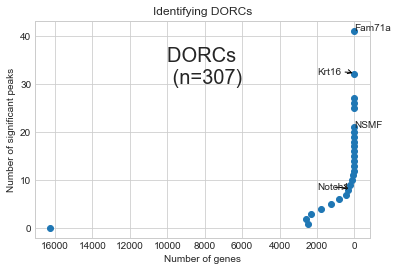

In [272]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig, ax = plt.subplots()
ax.scatter(threetempval,threetemp)
ax.annotate("Notch1", (239, 8), xytext = (2000, 8), arrowprops = dict(  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
#ax.text(239, 7, "Notch1")
ax.annotate("Krt16", (2, 32), xytext = (2000, 32), arrowprops = dict(  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
#ax.text(2, 32, "Cux1")
ax.text(10000, 30, "DORCs \n (n=" + str(len(temp[temp['gene'] >= 10])) + ")", size = 20)
ax.text(1, 41, "Fam71a")
ax.text(5, 21, "NSMF")
#ax.text(26, 19, "Krt79")
#ax.text(1, 53, "Col3a1", color = "red")
#ax.annotate("Nfatc1", (13, 21), xytext = (2000, 21), arrowprops = dict(  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
#ax.plot(threetempval, threetemp)
ax.invert_xaxis()
ax.set_xlabel('Number of genes')
ax.set_ylabel('Number of significant peaks')
ax.set_title('Identifying DORCs')


In [273]:
table['End'] = [i.split('_')[2] for i in table['peak']]
table['Start'] = [i.split('_')[1] for i in table['peak']]
table['peak'] = [i.split('_')[0] + '_' + i.split('_')[1] for i in table['peak']]
table.head()

,peak,gene,observed,mean,stdev,zscore,pval,End,Start
7,chr10_100015525,Kitl,0.085595,0.054809,0.018346,1.678085,0.046665,100016026,100015525
43,chr10_100455797,Tmtc3,-0.021374,0.007598,0.014251,-2.033000,0.021026,100456298,100455797
46,chr10_100474989,Cep290,0.045945,0.014171,0.016158,1.966524,0.024619,100475490,100474989
47,chr10_100476081,Cep290,-0.022557,0.013936,0.015782,-2.312283,0.010381,100476582,100476081
52,chr10_100484188,Tmtc3,0.052253,0.021262,0.017569,1.763961,0.038869,100484689,100484188


In [274]:
table.columns = ['peak', 'Gene', 'Corr', 'Mean', 'StDev', 'Zscore', 'Pvalue', 'End', 'Start']
table['NumCorr'] = table.groupby(['Gene'])['Gene'].transform('count')
table = table.reset_index(drop = True)

# WRITE TO CSV

In [231]:
table.to_csv('foxa1_data/G2_dorcs_nopseudo.csv')